<a href="https://colab.research.google.com/github/tamagoyaki-chiu/ml0716/blob/master/fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **fashion**-mnist


In [2]:
from tensorflow.keras.datasets.fashion_mnist import load_data
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test)= load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


ans: 9


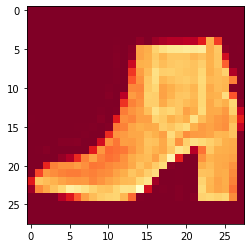

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
idx = 21231
print("ans:", y_train[idx])
plt.imshow(x_train[idx], cmap="YlOrRd_r") #https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html 可以看到顏色

In [6]:
import pandas as pd
pd.DataFrame(x_train[idx])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,8,1,14,22,28,28,32,31,63,158,85,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,2,0,6,148,156,186,202,212,214,219,216,221,157,177,6,0,1
6,0,0,0,0,0,0,0,0,0,0,0,3,0,8,147,159,179,163,176,176,175,165,173,159,175,48,0,0
7,0,0,0,0,0,0,0,0,0,0,0,3,0,43,159,161,183,169,177,180,178,173,183,160,176,105,0,0
8,0,0,0,0,0,0,0,0,0,0,0,2,0,81,143,168,203,183,184,179,175,173,190,158,169,185,25,0
9,0,0,0,0,0,0,0,0,0,0,0,2,0,100,133,177,200,164,172,178,181,175,193,165,168,164,121,0


In [7]:
from tensorflow.keras.models import Sequential #建模型
from tensorflow.keras.layers import Dense
layers = [
    # 784 * 128 + 128(bias)
    Dense(128, activation="relu", input_dim=784),
    # 128 * 10 + 10(bias)
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
from tensorflow.keras.losses import CategoricalCrossentropy #對 x y 處理
from tensorflow.keras.optimizers import Adam
model.compile(loss=CategoricalCrossentropy(),
       optimizer=Adam(),
       metrics=["accuracy"])

In [9]:
from tensorflow.keras.utils import to_categorical  #預處理
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(y_train[0])
print(y_train_cat[0])

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [10]:
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
save_callback = ModelCheckpoint("mnist.h5", save_best_only=True)
stop_callback = EarlyStopping(patience=5, restore_best_weights=True)
# batch_size: 看幾筆再做一次梯度(平均)下降[20-200]\
# validation_split: 切出一部分資料來驗證模型好壞
# epoch: 
# verbose: 2 不要進度條
model.fit(x_train_norm,
     y_train_cat,
     batch_size=200,
     validation_split=0.1,
     epochs=50,
     verbose=2,
     callbacks=[stop_callback, save_callback])

Epoch 1/50
270/270 - 1s - loss: 0.6053 - accuracy: 0.7930 - val_loss: 0.4593 - val_accuracy: 0.8390
Epoch 2/50
270/270 - 1s - loss: 0.4250 - accuracy: 0.8524 - val_loss: 0.4309 - val_accuracy: 0.8490
Epoch 3/50
270/270 - 1s - loss: 0.3890 - accuracy: 0.8643 - val_loss: 0.3684 - val_accuracy: 0.8717
Epoch 4/50
270/270 - 1s - loss: 0.3597 - accuracy: 0.8726 - val_loss: 0.3605 - val_accuracy: 0.8707
Epoch 5/50
270/270 - 1s - loss: 0.3438 - accuracy: 0.8761 - val_loss: 0.3708 - val_accuracy: 0.8718
Epoch 6/50
270/270 - 1s - loss: 0.3314 - accuracy: 0.8808 - val_loss: 0.3529 - val_accuracy: 0.8737
Epoch 7/50
270/270 - 1s - loss: 0.3096 - accuracy: 0.8894 - val_loss: 0.3345 - val_accuracy: 0.8797
Epoch 8/50
270/270 - 1s - loss: 0.2989 - accuracy: 0.8923 - val_loss: 0.3481 - val_accuracy: 0.8750
Epoch 9/50
270/270 - 1s - loss: 0.2895 - accuracy: 0.8950 - val_loss: 0.3317 - val_accuracy: 0.8822
Epoch 10/50
270/270 - 1s - loss: 0.2839 - accuracy: 0.8968 - val_loss: 0.3211 - val_accuracy: 0.8830

In [12]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.3310 - accuracy: 0.8870


[0.33103296160697937, 0.8870000243186951]

In [13]:
# model.save("mlp.h5")
from tensorflow.keras.models import load_model
loaded = load_model("mnist.h5")
#不需要:compile 可以: fit/evaluate/predict
loaded.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.3310 - accuracy: 0.8870


[0.33103296160697937, 0.8870000243186951]

In [14]:
# sklearn: predict(預測類別) predict_proba(預測機率)
# tensorflow: predict_classes(預測類別) predict(預測機率)
pre = model.predict_classes(x_test_norm)
pre

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1, ..., 8, 1, 5])

In [15]:
import pandas as pd
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pre),
       index=["{}(真實)".format(i) for i in range(10)],
       columns=["{}(預測)".format(i) for i in range(10)])

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(真實),812,2,12,18,4,2,145,0,5,0
1(真實),2,975,0,17,3,0,3,0,0,0
2(真實),15,0,792,16,110,0,66,0,1,0
3(真實),21,11,9,901,34,0,21,0,3,0
4(真實),0,1,82,25,830,0,60,0,2,0
5(真實),0,0,0,1,0,953,0,29,1,16
6(真實),98,0,71,32,70,0,728,0,1,0
7(真實),0,0,0,0,0,9,0,973,0,18
8(真實),7,1,5,6,7,3,9,9,953,0
9(真實),0,0,0,0,0,7,1,39,0,953


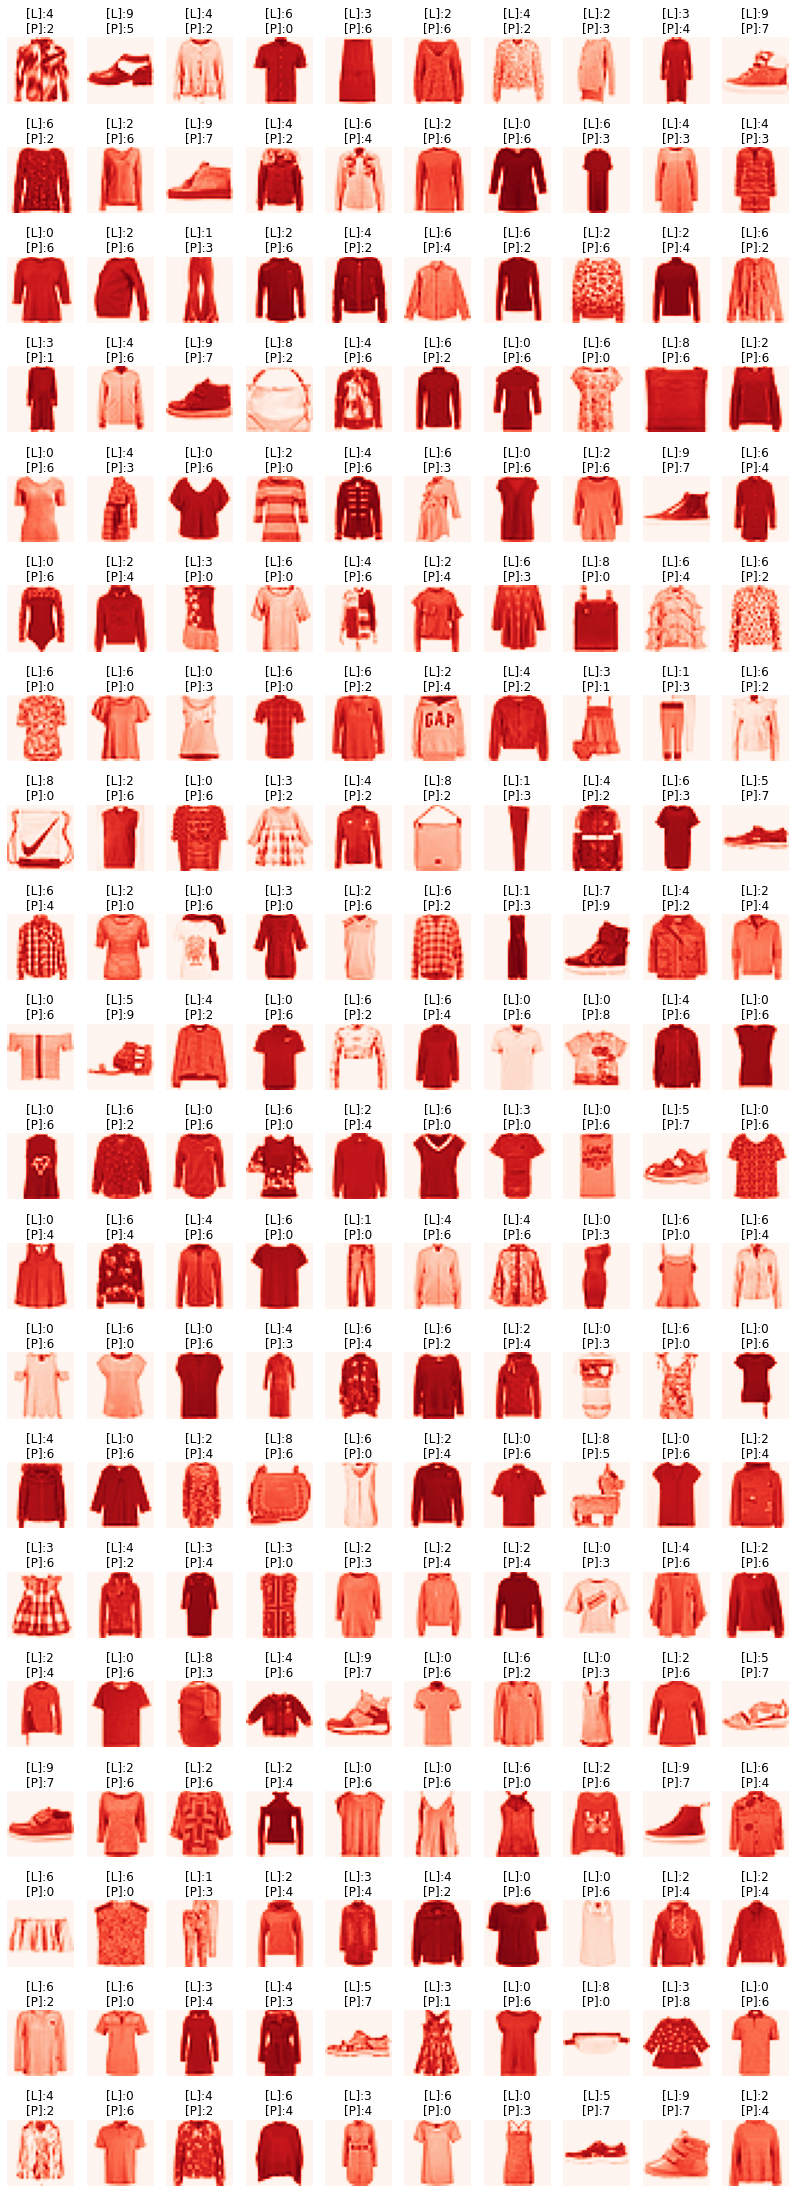

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(14, 42))
idx = np.nonzero(pre != y_test)[0][:200]
width = 10
height = len(idx) // width + 1
for i, d in enumerate(idx):
    img, label, p = x_test[d], y_test[d], pre[d]
    t = "[L]:{}\n[P]:{}".format(label, p)
    plt.subplot(height, width, i+1)
    plt.title(t)
    plt.axis('off')
    plt.imshow(img, cmap='Reds')